### P2_1 Batch training

In [2]:
import numpy as np
import pandas as pd

import P1_1
import P2

In [3]:
#Generate data set
X_train, Y_train, X_test, Y_test = P1_1.Generate_train_test_data(500)
#2-D Weight between 0~0.1 and 0.1 for Bias
Weight = np.random.random(2)
Bias = 1

#There single nueral networks, lr = [1, 0.1, 0.01]
single_nn_1 = P2.Single_layer_neural_network(Weight, Bias, 1)
single_nn_01 = P2.Single_layer_neural_network(Weight, Bias, 0.1)
single_nn_001 = P2.Single_layer_neural_network(Weight, Bias, 0.01)
print(Weight, Bias)

[0.22342003 0.49381832] 1


In [4]:
#If batch size = 1000 (total length of data set -> same as batch training)
final_weight, final_bias = single_nn_1.Train(X_train, Y_train, epoch = 10000, batch_size = 10000)
final_weight, final_bias = single_nn_01.Train(X_train, Y_train, epoch = 10000, batch_size = 10000)
final_weight, final_bias = single_nn_001.Train(X_train, Y_train, epoch = 10000, batch_size = 10000)

Early Stop at epoch : 96, iteration : 0
Early Stop at epoch : 2819, iteration : 0
Early Stop at epoch : 208, iteration : 0


In [5]:
#Get predicted probability and caculate accuracy with threshold at 0.5
prob_1 = single_nn_1.predict_proba(X_test)
pred_1 = np.where(prob_1 > 0.5, 1, 0)
accuracy_1 = P2.Accuracy(pred_1, Y_test)


prob_01 = single_nn_01.predict_proba(X_test)
pred_01 = np.where(prob_01 > 0.5, 1, 0)
accuracy_01 = P2.Accuracy(pred_01, Y_test)

prob_001 = single_nn_001.predict_proba(X_test)
pred_001 = np.where(prob_001 > 0.5, 1, 0)
accuracy_001 = P2.Accuracy(pred_001, Y_test)

In [8]:
print(f"Accuracy : {accuracy_1}, Weight : {single_nn_1.affine.w}, Bias : {single_nn_1.affine.b}")
print(f"Accuracy : {accuracy_01}, Weight : {single_nn_01.affine.w}, Bias : {single_nn_01.affine.b}")
print(f"Accuracy : {accuracy_001}, Weight : {single_nn_001.affine.w}, Bias : {single_nn_001.affine.b}")

Accuracy : 0.885, Weight : [-19.75468421  24.58819496], Bias : 7.828401261309737
Accuracy : 0.9625, Weight : [-4.94497056  5.07077007], Bias : -1.20142382437365
Accuracy : 0.9625, Weight : [-4.28849176  4.42861923], Bias : -1.2993218078488071


In [6]:
# Create dataframe to draw plot
df = pd.DataFrame(X_test)
df['pred1'] = pred_1
df['pred01'] = pred_01
df['pred001'] = pred_001
df.columns = ["x1", "x2", 'pred1', "pred01", "pred001"]

<AxesSubplot:xlabel='x1', ylabel='x2'>

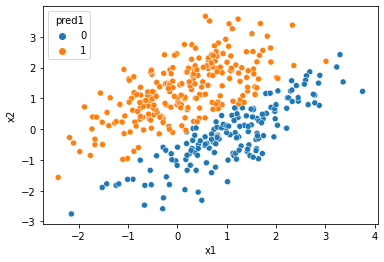

In [7]:
import seaborn as sns
sns.scatterplot(x=df['x1'], y=df['x2'], hue=df['pred1'])

<AxesSubplot:xlabel='x1', ylabel='x2'>

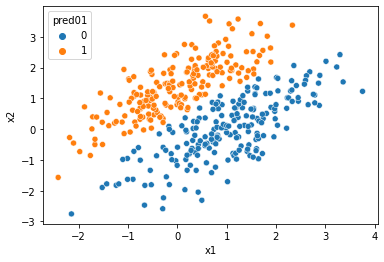

In [8]:
sns.scatterplot(x=df['x1'], y=df['x2'], hue=df['pred01'])

<AxesSubplot:xlabel='x1', ylabel='x2'>

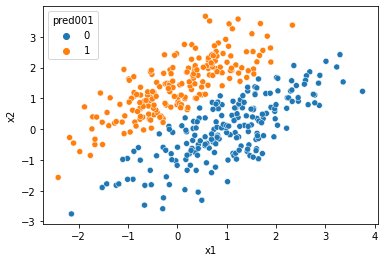

In [9]:
import seaborn as sns
sns.scatterplot(x=df['x1'], y=df['x2'], hue=df['pred001'])

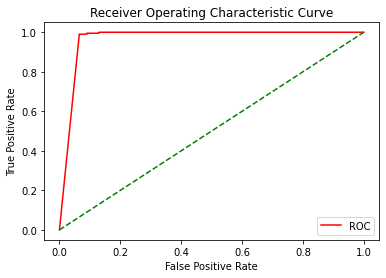

In [11]:
#caculate fpr, tpr and draw ROC curve
from sklearn.metrics import roc_curve

fper, tper, thresholds = roc_curve(Y_test, prob_1)
P2.plot_roc_curve(fper, tper)

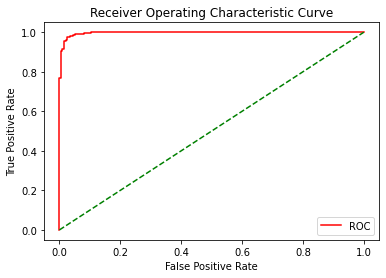

In [13]:
fper, tper, thresholds = roc_curve(Y_test, prob_01)
P2.plot_roc_curve(fper, tper)

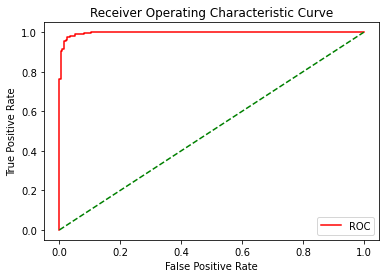

In [14]:
fper, tper, thresholds = roc_curve(Y_test, prob_001)
P2.plot_roc_curve(fper, tper)

### P2_2 Online training

In [27]:
#Generate data set
X_train, Y_train, X_test, Y_test = P1_1.Generate_train_test_data(500)
#2-D Weight between 0~0.1 and 0.1 for Bias
Weight = np.random.random(2)
Bias = 1

single_nn_1 = P2.Single_layer_neural_network(Weight, Bias, 1)
single_nn_01 = P2.Single_layer_neural_network(Weight, Bias, 0.1)
single_nn_001 = P2.Single_layer_neural_network(Weight, Bias, 0.01)
print(Weight, Bias)

[0.02672405 0.00044912] 1


In [35]:
#batch size = 1 -> same as online training

final_weight, final_bias = single_nn_1.Train(X_train, Y_train, epoch = 10000, batch_size = 1)
final_weight, final_bias = single_nn_01.Train(X_train, Y_train, epoch = 10000, batch_size = 1)
final_weight, final_bias = single_nn_001.Train(X_train, Y_train, epoch = 10000, batch_size = 1)

Early Stop at epoch : 0, iteration : 2, norm of gradient : 1.1574287786673166e-08
Early Stop at epoch : 0, iteration : 14, norm of gradient : 2.3040447513494583e-08
Early Stop at epoch : 0, iteration : 14, norm of gradient : 7.096636356153848e-08


In [29]:
#get probability to caculate accuracy

prob_1 = single_nn_1.predict_proba(X_test)
pred_1 = np.where(prob_1 > 0.5, 1, 0)
accuracy_1 = P2.Accuracy(pred_1, Y_test)


prob_01 = single_nn_01.predict_proba(X_test)
pred_01 = np.where(prob_01 > 0.5, 1, 0)
accuracy_01 = P2.Accuracy(pred_01, Y_test)

prob_001 = single_nn_001.predict_proba(X_test)
pred_001 = np.where(prob_001 > 0.5, 1, 0)
accuracy_001 = P2.Accuracy(pred_001, Y_test)

In [30]:
print(f"Accuracy : {accuracy_1}, Weight : {single_nn_1.affine.w}, Bias : {single_nn_1.affine.b}")
print(f"Accuracy : {accuracy_01}, Weight : {single_nn_01.affine.w}, Bias : {single_nn_01.affine.b}")
print(f"Accuracy : {accuracy_001}, Weight : {single_nn_001.affine.w}, Bias : {single_nn_001.affine.b}")

Accuracy : 0.9125, Weight : [-1.79166094  2.88572608], Bias : -0.43270112516848797
Accuracy : 0.9375, Weight : [-2.05012101  2.20448284], Bias : -1.273173538757817
Accuracy : 0.9375, Weight : [-2.00782647  2.0274232 ], Bias : -1.2078460957173867


In [31]:
#DF for plot
df = pd.DataFrame(X_test)
df['pred1'] = pred_1
df['pred01'] = pred_01
df['pred001'] = pred_001
df.columns = ["x1", "x2", 'pred1', "pred01", "pred001"]

<AxesSubplot:xlabel='x1', ylabel='x2'>

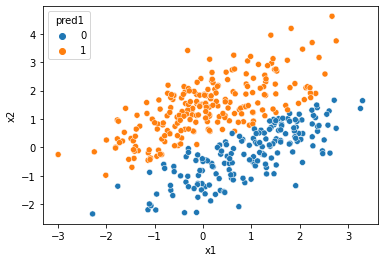

In [32]:
import seaborn as sns
sns.scatterplot(x=df['x1'], y=df['x2'], hue=df['pred1'])

<AxesSubplot:xlabel='x1', ylabel='x2'>

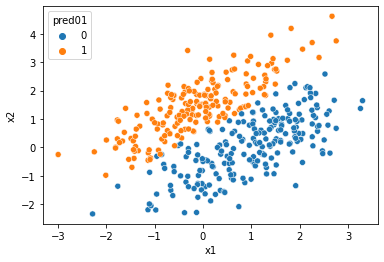

In [33]:
sns.scatterplot(x=df['x1'], y=df['x2'], hue=df['pred01'])

<AxesSubplot:xlabel='x1', ylabel='x2'>

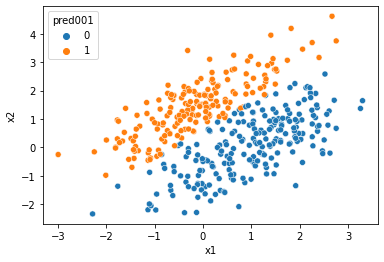

In [34]:
import seaborn as sns
sns.scatterplot(x=df['x1'], y=df['x2'], hue=df['pred001'])

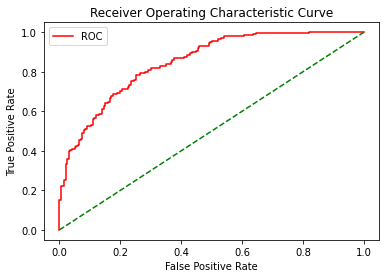

In [51]:
#calculate fpr, tpr and draw ROC curve

from sklearn.metrics import roc_curve

fper, tper, thresholds = roc_curve(Y_test, prob_1)
P2.plot_roc_curve(fper, tper)

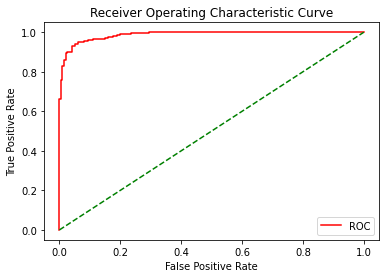

In [52]:
fper, tper, thresholds = roc_curve(Y_test, prob_01)
P2.plot_roc_curve(fper, tper)

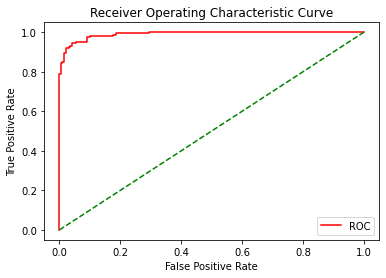

In [53]:
fper, tper, thresholds = roc_curve(Y_test, prob_001)
P2.plot_roc_curve(fper, tper)

### P2_3

In [67]:
single_nn_batch = P2.Single_layer_neural_network(Weight, Bias, 0.01)
final_weight, final_bias = single_nn_batch.Train(X_train, Y_train, epoch = 10000, batch_size = 10000)

single_nn_online = P2.Single_layer_neural_network(Weight, Bias, 0.01)
final_weight, final_bias = single_nn_online.Train(X_train, Y_train, epoch = 10000, batch_size = 1)

Early Stop at epoch : 193, iteration : 0
Early Stop at epoch : 4, iteration : 358, norm of gradient : 3.17653526519182e-05


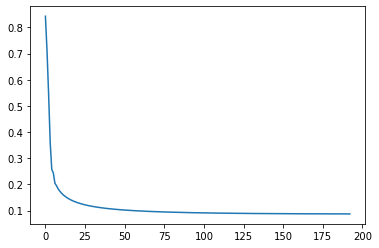

In [68]:
plt.plot(pd.DataFrame(single_nn_batch.log)[0])

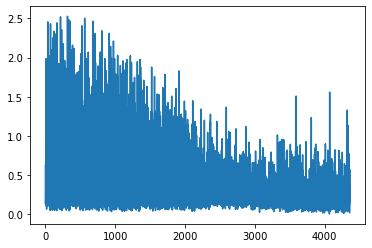

In [69]:
plt.plot(pd.DataFrame(single_nn_online.log)[0])